# EDA - GEDA
## Estancia de investigación Maestría de Ciencia de Datos
## Aide Jazmín González Cruz

### 1. Carga de librerías

In [2]:
import pandas as pd
import numpy as np
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils

### 2. Carga de datos

In [3]:
df = utils.load_df("../Data/preprocessing_data.pkl")
df

,newid,cx_curp,nota_medica,glucosa,colesterol,trigliceridos,hdl,ldl,fecha,presion_arterial,...,glucosa1,glucosa2,edad,hta,dm_cie,hta_cie,fecha_laboratorio,dif_date_lab,dif_date_lab_from_ini,occurance_counter
0,2128MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130/90,...,NaN,NaN,55.0,0.0,0.0,0.0,NaT,NaN,NaN,1
1,31723PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,134,NaN,NaN,NaN,NaN,NaN,120/90,...,134.0,NaN,57.0,0.0,0.0,0.0,NaT,NaN,NaN,2
2,41103ROGG540607PNXOCQD4,ROGG540607PNXOCQD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,0.0,0.0,0.0,NaT,NaN,NaN,3
3,46589PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,57.0,0.0,0.0,0.0,NaT,NaN,NaN,4
4,47454MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56.0,0.0,0.0,0.0,NaT,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6410853MAVC341201G0YJFRC1,MAVC341201G0YJFRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130/75,...,NaN,NaN,87.0,0.0,1.0,0.0,NaT,NaN,NaN,4458
4995,3356716COAG580101F7ALKRC3,COAG580101F7ALKRC3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120/80,...,NaN,NaN,63.0,0.0,1.0,0.0,NaT,NaN,NaN,4459
4996,3359740PAGJ690411WZ0YDRC1,PAGJ690411WZ0YDRC1,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,...,125.0,NaN,52.0,0.0,0.0,0.0,NaT,NaN,NaN,4460
4997,8273014MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,124,NaN,NaN,NaN,NaN,NaN,110/70,...,124.0,NaN,73.0,0.0,0.0,0.0,NaT,NaN,NaN,4461


### 3. Data profiling

- **Datos únicos por variable**

In [4]:
utils.unicos_val_by_col(df)

newid:  4999
cx_curp:  55
nota_medica:  1
glucosa:  232
colesterol:  130
trigliceridos:  167
hdl:  21
ldl:  23
fecha:  1
presion_arterial:  229
hba1c:  33
hipertension:  1
plaquetas:  61
creatinina:  25
acido_urico:  46
urea:  43
peso:  399
altura:  53
tfg:  42
imc:  75
año_de_diagnostico_diabetes:  2
año_de_diagnostico_hipertension:  2
fechas_procesadas:  1
bandera_fechas_procesadas:  1
fuente:  3
in_consulta:  4998
fecha_nacimiento:  55
sexo:  3
medicamentos:  4031
codigos_cie:  786
diagnosticos:  881
fecha_consulta:  4999
sistolica:  61
diastolica:  43
glucosa1:  227
glucosa2:  1
edad:  70
hta:  1
dm_cie:  2
hta_cie:  2
fecha_laboratorio:  264
dif_date_lab:  174
dif_date_lab_from_ini:  239
occurance_counter:  4461


- **Variables numéricas**

In [5]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(23,
 array(['colesterol', 'trigliceridos', 'hdl', 'ldl', 'hba1c', 'plaquetas',
        'creatinina', 'acido_urico', 'urea', 'peso', 'altura', 'tfg',
        'imc', 'bandera_fechas_procesadas', 'in_consulta', 'sistolica',
        'diastolica', 'glucosa1', 'glucosa2', 'edad', 'dif_date_lab',
        'dif_date_lab_from_ini', 'occurance_counter'], dtype=object))

In [7]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,...,bandera_fechas_procesadas,in_consulta,sistolica,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter
0,max,351.000000,1332.000000,73.000000,171.000000,6009.000000,475000.000000,22.000000,9.500000,545.000000,...,NaN,8.273014e+06,200.000000,140.000000,448.000000,NaN,87.000000,9953.000000,11637.000000,4461.000000
1,min,40.000000,63.000000,20.000000,22.800000,5.100000,71.000000,0.500000,2.700000,14.000000,...,NaN,1.326000e+03,1.000000,1.000000,1.000000,NaN,19.000000,1.000000,0.000000,1.000000
2,mean,198.576580,233.381333,42.926429,106.256000,81.420610,47890.963768,1.388741,5.908415,68.280377,...,NaN,2.575754e+06,122.147468,76.564097,141.856330,NaN,59.401173,319.278618,1363.195167,1991.069814
3,stdv,45.049836,160.549756,14.064608,38.186364,662.675585,110595.785285,2.456647,1.520544,78.451828,...,NaN,2.033067e+06,13.115774,8.445338,61.678137,NaN,12.792696,821.528384,1479.125853,1399.150603
4,25%,172.000000,136.000000,35.750000,88.000000,7.000000,244.000000,0.700000,4.825000,34.000000,...,NaN,9.478235e+05,120.000000,70.000000,101.000000,NaN,52.000000,51.000000,310.250000,712.500000
5,median,199.000000,185.500000,45.000000,110.000000,8.000000,279.000000,0.900000,6.200000,46.300000,...,NaN,2.052091e+06,120.000000,80.000000,124.000000,NaN,61.000000,133.000000,1112.500000,1962.000000
6,75%,220.000000,277.500000,49.000000,131.000000,9.475000,362.000000,1.100000,6.875000,86.000000,...,NaN,3.805668e+06,130.000000,80.000000,160.000000,NaN,69.000000,242.000000,1980.000000,3211.500000
7,kurtosis,1.324995,13.861308,0.143351,-0.073740,81.998681,3.846110,46.479357,-0.577569,26.726602,...,NaN,-7.290608e-02,12.008995,9.118944,3.136683,NaN,0.114271,83.698161,14.397403,-1.272564
8,skewness,0.295096,2.950550,0.072661,-0.608905,9.055277,2.205642,6.539500,-0.034116,4.656673,...,NaN,8.848076e-01,-0.128152,-0.332620,1.571534,NaN,-0.605857,8.059084,2.886722,0.084064
9,uniques,129.000000,166.000000,20.000000,22.000000,32.000000,60.000000,24.000000,45.000000,42.000000,...,0,4.998000e+03,60.000000,42.000000,226.000000,0,69.000000,173.000000,238.000000,4461.000000


- **Fechas**

In [9]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(3,
 array(['fecha_nacimiento', 'fecha_consulta', 'fecha_laboratorio'],
       dtype=object))

In [10]:
date_profiling_output = {elem: utils.dates_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,fecha_nacimiento,fecha_consulta,fecha_laboratorio
0,max,1987-04-10 00:00:00,2021-08-02 18:32:22.237000,2021-06-28 00:00:00
1,min,1933-05-01 00:00:00,2003-11-19 17:39:18.500000,2009-12-02 00:00:00
2,missings,56,0,4711
3,uniques,54,4999,263
4,top1_repeated,1963-02-13 00:00:00,2021-08-02 18:32:22.237000,2018-03-01 00:00:00
5,top2_repeated,1977-06-16 00:00:00,2011-03-11 10:18:38.663000,2020-01-01 00:00:00
6,top3_repeated,1955-03-21 00:00:00,2011-02-24 12:03:55.283000,2018-09-01 00:00:00


- **Variables categóricas**

In [11]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(4, array(['sexo', 'hta', 'dm_cie', 'hta_cie'], dtype=object))

In [12]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in category_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,sexo,hta,dm_cie,hta_cie
0,mode,"['F'] Categories (2, object): ['F', 'M']","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]"
1,numero_categorias,2,1,2,2
2,nombres_categoria,"['M', 'F', NaN] Categories (2, object): ['M', ...","[0.0] Categories (1, float64): [0.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]"
3,valores_unicos,2,1,2,2
4,renglones_totales,4999,4999,4999,4999
5,faltantes_totales,56,0,0,0
6,proporcion_faltantes,1.12022,0,0,0
7,top1,F,0,0,0
8,top2,M,1,1,1
9,top3,undefined,undefined,undefined,undefined


- **Strings**

In [15]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(14,
 array(['newid', 'cx_curp', 'nota_medica', 'glucosa', 'fecha',
        'presion_arterial', 'hipertension', 'año_de_diagnostico_diabetes',
        'año_de_diagnostico_hipertension', 'fechas_procesadas', 'fuente',
        'medicamentos', 'codigos_cie', 'diagnosticos'], dtype=object))

In [17]:
string_profiling_output = {elem: utils.string_profiling(df, elem)\
                             for elem in string_variables}

df_string_profiling = pd.DataFrame(string_profiling_output).reset_index()
df_string_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_string_profiling

,metric,newid,cx_curp,nota_medica,glucosa,fecha,presion_arterial,hipertension,año_de_diagnostico_diabetes,año_de_diagnostico_hipertension,fechas_procesadas,fuente,medicamentos,codigos_cie,diagnosticos
0,mode,"[1000536SOLG360601I3NUBIA1, 1003096DIRL630201M...",[DIRL630201M8ADARC1],[],[120],[],[120/80],[],[],[],[],[corhis_somatometria],"[CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CA...",[E119],[Diabetes tipo II]
1,uniques,4999,55,0,231,0,228,0,1,1,0,3,4030,785,880
2,missings,0,0,4999,3771,4999,537,4999,4999,4999,4999,0,670,3033,3033
3,average lenght,24.7149,18,3,2.95379,3,5.68474,3,3,3,3,26.4323,843.801,5.74875,31.2967
4,max lenght,25,18,3,5,3,7,3,3,3,3,38,26962,39,251
5,min lenght,22,18,3,1,3,3,3,3,3,3,18,3,3,3
6,top1_repeated,999802LOVM470206XDKAIMD2,DIRL630201M8ADARC1,undefined,120,undefined,120/80,undefined,undefined,undefined,undefined,corhis_somatometria,"CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CAP...",E119,Diabetes tipo II
7,top2_repeated,2332965MACL740410NK1YGRC2,CAAJ770616UNX3HRC2,undefined,nan,undefined,120/70,undefined,undefined,undefined,undefined,corhis_somatometria/exphis_hc_diabetes,GLIBENCLAMIDA TABLETAS. CADA TABLETA CONTIENE:...,"E119,I10X",Diabetes mellitus no insulinodependiente sin c...
8,top3_repeated,2325821OOCG680408JBU4ERC2,ZEPL5503219FZQ6QC2,undefined,100,undefined,110/70,undefined,undefined,undefined,undefined,exphis_hc_diabetes,INSULINA HUMANA. SUSPENSION INYECTABLE. ACCION...,Z713,Diabetes de edad adulta


### 4. EDA

Creando data frame auxiliar para ver proporciones de datos

In [23]:
df_aux = df
df_aux['sexo_n'] = ""
df_aux['edad_c'] = ""

for i in range(len(df_aux['newid'])):  
    
    if pd.isna(df_aux['glucosa1'][i]):        
        df_aux['glucosa1'][i] = 'NaN'        
    else:        
        df_aux['glucosa1'][i] = 'Value'
        
    if pd.isna(df_aux['glucosa2'][i]):
        df_aux['glucosa2'][i] = 'NaN'        
    else:        
        df_aux['glucosa2'][i] = 'Value'
    
    if pd.isna(df_aux['sistolica'][i]):        
        df_aux['sistolica'][i] = 'NaN'        
    else:        
        df_aux['sistolica'][i] = 'Value'
        
    if pd.isna(df_aux['diastolica'][i]):
        df_aux['diastolica'][i] = 'NaN'        
    else:        
        df_aux['diastolica'][i] = 'Value'
    
    if pd.isna(df_aux['colesterol'][i]):        
        df_aux['colesterol'][i] = 'NaN'        
    else:        
        df_aux['colesterol'][i] = 'Value'
        
    if pd.isna(df_aux['trigliceridos'][i]):
        df_aux['trigliceridos'][i] = 'NaN'        
    else:        
        df_aux['trigliceridos'][i] = 'Value'
        
    if pd.isna(df_aux['hdl'][i]):        
        df_aux['hdl'][i] = 'NaN'        
    else:        
        df_aux['hdl'][i] = 'Value'
        
    if pd.isna(df_aux['ldl'][i]):
        df_aux['ldl'][i] = 'NaN'        
    else:        
        df_aux['ldl'][i] = 'Value'
    
    if pd.isna(df_aux['hba1c'][i]):        
        df_aux['hba1c'][i] = 'NaN'        
    else:        
        df_aux['hba1c'][i] = 'Value'
        
    if pd.isna(df_aux['plaquetas'][i]):
        df_aux['plaquetas'][i] = 'NaN'        
    else:        
        df_aux['plaquetas'][i] = 'Value'
    
    if pd.isna(df_aux['creatinina'][i]):        
        df_aux['creatinina'][i] = 'NaN'        
    else:        
        df_aux['creatinina'][i] = 'Value'

    if pd.isna(df_aux['acido_urico'][i]):
        df_aux['acido_urico'][i] = 'NaN'        
    else:        
        df_aux['acido_urico'][i] = 'Value'
    
    if pd.isna(df_aux['urea'][i]):        
        df_aux['urea'][i] = 'NaN'        
    else:        
        df_aux['urea'][i] = 'Value'
        
    if pd.isna(df_aux['peso'][i]):
        df_aux['peso'][i] = 'NaN'        
    else:        
        df_aux['peso'][i] = 'Value'
    
    if pd.isna(df_aux['altura'][i]):        
        df_aux['altura'][i] = 'NaN'        
    else:        
        df_aux['altura'][i] = 'Value'
        
    if pd.isna(df_aux['tfg'][i]):
        df_aux['tfg'][i] = 'NaN'        
    else:        
        df_aux['tfg'][i] = 'Value'
  
    if pd.isna(df_aux['imc'][i]):        
        df_aux['imc'][i] = 'NaN'        
    else:        
        df_aux['imc'][i] = 'Value'
        
    if pd.isna(df_aux['año_de_diagnostico_diabetes'][i]):
        df_aux['año_de_diagnostico_diabetes'][i] = 'NaN'        
    else:        
        df_aux['año_de_diagnostico_diabetes'][i] = 'Value'
    
    if pd.isna(df_aux['año_de_diagnostico_hipertension'][i]):        
        df_aux['año_de_diagnostico_hipertension'][i] = 'NaN'        
    else:        
        df_aux['año_de_diagnostico_hipertension'][i] = 'Value'
        
    #if pd.isna(df_aux['fechas_procesadas2'][i]):
    #    df_aux['fechas_procesadas2'][i] = 'NaN'        
    #else:        
    #    df_aux['fechas_procesadas2'][i] = 'Value'
    
    if pd.isna(df_aux['bandera_fechas_procesadas'][i]):        
        df_aux['bandera_fechas_procesadas'][i] = 'NaN'        
    else:        
        df_aux['bandera_fechas_procesadas'][i] = 'Value'
        
    if pd.isna(df_aux['in_consulta'][i]):
        df_aux['in_consulta'][i] = 'NaN'        
    else:        
        df_aux['in_consulta'][i] = 'Value'
            
    if pd.isna(df_aux['fecha_nacimiento'][i]):        
        df_aux['fecha_nacimiento'][i] = 'NaN'        
    else:        
        df_aux['fecha_nacimiento'][i] = 'Value'
        
    if pd.isna(df_aux['sexo'][i]):
        df_aux['sexo_n'][i] = 'NaN'        
    else:        
        df_aux['sexo_n'][i] = 'Value'
        
    if pd.isna(df_aux['edad'][i]):
        df_aux['edad_c'][i] = 'NaN'        
    else:        
        df_aux['edad_c'][i] = 'Value'
    """
    if pd.isna(df_aux['hta'][i]):
        df_aux['hta'][i] = 'NaN'        
    else:        
        df_aux['hta'][i] = 'Value'
        
    if pd.isna(df_aux['dm_cie'][i]):
        df_aux['dm_cie'][i] = 'NaN'        
    else:        
        df_aux['dm_cie'][i] = 'Value'
        
    if pd.isna(df_aux['hta_cie'][i]):
        df_aux['hta_cie'][i] = 'NaN'        
    else:        
        df_aux['hta_cie'][i] = 'Value'
    """    
    
prop_g1 = df_aux.groupby(['glucosa1'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['glucosa2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['sistolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['diastolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['colesterol'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['trigliceridos'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hdl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['ldl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hba1c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['plaquetas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['creatinina'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['acido_urico'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['urea'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['peso'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['altura'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['tfg'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['imc'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['año_de_diagnostico_diabetes'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['año_de_diagnostico_hipertension'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['fechas_procesadas2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['bandera_fechas_procesadas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['in_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['fecha_nacimiento'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['sexo_n'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['edad_c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['dm_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

,glucosa1,count,prop
0,NaN,3821,0.764506
1,Value,1177,0.235494


,glucosa2,count,prop


,sistolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,diastolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,colesterol,count,prop
0,NaN,3755,0.933151
1,Value,269,0.066849


,trigliceridos,count,prop
0,NaN,3754,0.932903
1,Value,270,0.067097


,hdl,count,prop
0,NaN,3502,0.992068
1,Value,28,0.007932


,ldl,count,prop
0,NaN,3505,0.992918
1,Value,25,0.007082


,hba1c,count,prop
0,NaN,3589,0.977663
1,Value,82,0.022337


,plaquetas,count,prop
0,NaN,3640,0.981397
1,Value,69,0.018603


,creatinina,count,prop
0,NaN,3568,0.963543
1,Value,135,0.036457


,acido_urico,count,prop
0,NaN,3627,0.977892
1,Value,82,0.022108


,urea,count,prop
0,NaN,3167,0.98354
1,Value,53,0.01646


,peso,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,altura,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,tfg,count,prop
0,NaN,3158,0.980745
1,Value,62,0.019255


,imc,count,prop
0,NaN,3575,0.971731
1,Value,104,0.028269


,año_de_diagnostico_diabetes,count,prop
0,NaN,4998,0.9998
1,Value,1,0.0002


,año_de_diagnostico_hipertension,count,prop
0,NaN,4998,0.9998
1,Value,1,0.0002


KeyError: 'fechas_procesadas2'

### 5. GEDA

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib

- **¿Qué proporción de datos vacios se tienen por vaiable?**

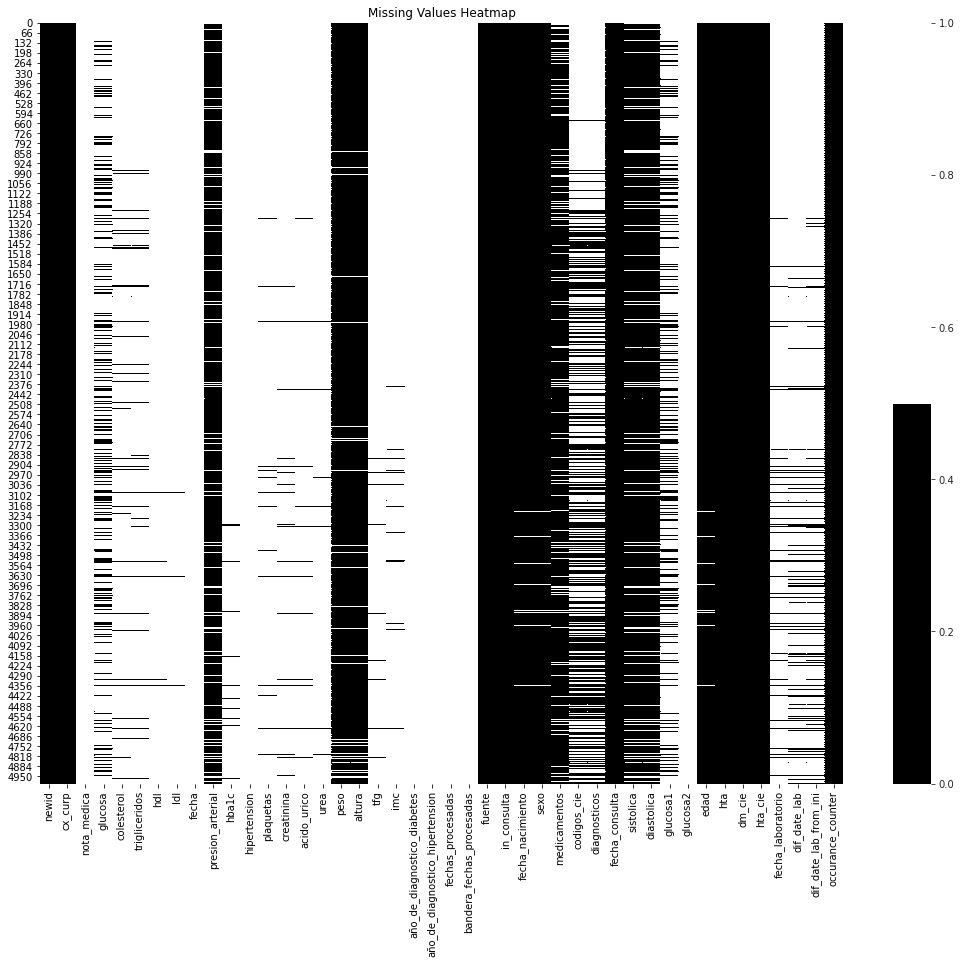

In [20]:
cols = df.columns 
colours = ["#000000","#FFFFFF"]
f, ax = plt.subplots(figsize = (18,14))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

**Distribución de las variables númericas**